In [1]:
import numpy as np
from random import shuffle
from itertools import chain, combinations
from itertools import compress

In [2]:
def powerset(iterable):
    subset_list = list(chain.from_iterable(combinations(iterable, r)
                                          for r in range(1,len(iterable)+1)))
    return [list(i) for i in subset_list]

In [3]:
def find_factor(n):
    factor_values = []
    for i in range(1, n+1):
        if n % i == 0:
            factor_values.append(i)
    
    values = []
    for v in factor_values:
        values.append(v)
    return values[1:-1]

In [4]:
def divide_uniform(pop_item, position, axis_idx, n_div, is_factors = False):
    if is_factors:
        size_list = [(pop_item[axis_idx])//n_div] * n_div
    else:
        size_list = []
        for i in range(n_div-1):
            if i == 0:
                size_list.append((pop_item[axis_idx])//(n_div-i))
            else:
                size_list.append((pop_item[axis_idx] - size_list[-1]) // (n_div-i))
        size_list.append(pop_item[axis_idx] - np.sum(size_list))
    sizes, positions = [], []
    
    for i in range(n_div):
        item = pop_item.copy()
        item[axis_idx] = size_list[i]
        sizes.append(item)
        new_position = position.copy()
        
        if i != 0:
            new_position[axis_idx] += int(np.sum(size_list[:i]))
        positions.append(new_position)
    return sizes, positions

In [5]:
def divide_uniform_multi_axis(item_size, item_pos, axis_idx_list, 
                              n_div, is_factors = False):
    item_size = [item_size]
    item_pos = [item_pos]
    
    for axis_idx in axis_idx_list:
        n = len(item_size)
        sizes, positions = [], []
        
        for i in range(n):
            size = item_size.pop()
            pos = item_pos.pop()
            size, pos = divide_uniform(size, pos, axis_idx, n_div, is_factors)
            sizes += size
            positions += pos
        item_size = sizes.copy()
        item_pos = positions.copy()
    return sizes, positions

In [6]:
def generate_3dbox(case_size=[[20,20,20],[25,20,15]], min_s=3, is_prediv=0):
    case_input = []
    case_gt_upleft = []
    
    for c_l, c_b, c_h in case_size:
        N_mdd = 20 #np.random.choice(list(range(23, 28)), 1)
        X_input = [[c_l, c_b, c_h]]
        gt_upleft = [[0,0,0]]
        
        if is_prediv == 8: #8분할
            X_input, gt_upleft = divide_uniform_multi_axis(X_input.pop(),
                                                          gt_upleft.pop(),
                                                          [0,1,2], 2)
        elif is_prediv == 4: #4분할
            X_input, gt_upleft = divide_uniform_multi_axis(X_input.pop(),
                                                          gt_upleft.pop(),
                                                          [0,1], 2)
        elif is_prediv == 'h': #높이 분할
            X_input, gt_upleft = divide_uniform_multi_axis(X_input.pop(),
                                                          gt_upleft.pop(),
                                                          [2], 3)
            
        while len(X_input) < N_mdd:
            idx = np.random.choice(range(len(X_input)), 1)[0]
            pop_item = X_input.pop(idx) #[length, width, height]
            pop_gt_upleft = gt_upleft.pop(idx)
            axis_idx = np.random.choice([0,1,2],1)[0]
            
            factors = find_factor(pop_item[axis_idx])
            factors = list(compress(factors, 
                                   pop_item[axis_idx]/np.array(factors) >= 3))
            
            if pop_item[axis_idx] < min_s * 2 or len(factors) == 0:
                X_input.append(pop_item)
                gt_upleft.append(pop_gt_upleft)
            else:
                n_div = np.random.choice(factors, 1)[0]
                
                if False:
                    axis_idx_list = []
                    for i in range(3):
                        if pop_item[idx] == pop_item[i]:
                            axis_idx_list.append(i)
                    axis_idx_list = powerset(axis_idx_list)
                    axis_idx_list = list(compress(axis_idx_list, 
                                                  [idx in i for i in axis_idx_list]))
                    axis_idx_list = axis_idx_list[
                        np.random.choice(len(axis_idx_list), 1)[0]]
                axis_idx_list = [axis_idx]
                
                sizes, positions = divide_uniform_multi_axis(pop_item,
                                                            pop_gt_upleft,
                                                            axis_idx_list,
                                                            n_div,
                                                            is_factors = True)
                X_input += sizes
                gt_upleft += positions
        
        idx = np.argsort(np.array(gt_upleft)[:,2])
        gt_upleft = np.array(gt_upleft)[idx]
        X_input = np.array(X_input)[idx]
        
        case_input.append(X_input)
        case_gt_upleft.append(gt_upleft)
    return np.squeeze(case_input), np.squeeze(case_gt_upleft)

In [7]:
n_type = 4
sizes, positions = [20,20,19],[0,0,0]
case_size = [[20,20,20,],[25,20,15]]
min_s = 2
is_prediv = 0

In [8]:
boxes, gt_tmp = generate_3dbox(case_size=[[20,20,20]], min_s = 3, is_prediv = 'h')
boxes, gt_tmp

(array([[20, 10,  6],
        [ 5, 10,  3],
        [ 5, 10,  3],
        [ 5, 10,  3],
        [ 5, 10,  3],
        [20, 10,  3],
        [ 4,  5,  7],
        [ 4,  5,  7],
        [ 4,  5,  7],
        [20,  5,  7],
        [20,  5,  7],
        [20,  5,  7],
        [ 4,  5,  7],
        [ 4,  5,  7],
        [10,  4,  7],
        [20,  4,  7],
        [20,  4,  7],
        [20,  4,  7],
        [20,  4,  7],
        [10,  4,  7]]),
 array([[ 0,  0,  0],
        [15, 10,  0],
        [10, 10,  0],
        [ 5, 10,  0],
        [ 0, 10,  0],
        [ 0, 10,  3],
        [12,  5,  6],
        [16,  5,  6],
        [ 4,  5,  6],
        [ 0,  0,  6],
        [ 0, 10,  6],
        [ 0, 15,  6],
        [ 0,  5,  6],
        [ 8,  5,  6],
        [ 0, 12, 13],
        [ 0,  4, 13],
        [ 0, 16, 13],
        [ 0,  8, 13],
        [ 0,  0, 13],
        [10, 12, 13]]))

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

In [20]:
def cuboid_data(o, size=(1,1,1)): #큐브로 만듬
    X = [[[0,1,0],[0,0,0],[1,0,0],[1,1,0]],
         [[0,0,0],[0,0,1],[1,0,1],[1,0,0]],
         [[1,0,1],[1,0,0],[1,1,0],[1,1,1]],
         [[0,0,1],[0,0,0],[0,1,0],[0,1,1]],
         [[0,1,0],[0,1,1],[1,1,1],[1,1,0]],
         [[0,1,1],[0,0,1],[1,0,1],[1,1,1]]]
    X = np.array(X).astype(float)
    
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

In [11]:
def plotCubeAt(positions, sizes=None, colors=None, **kwargs):
    g = []
    for p,s,c in zip(positions, sizes, colors):
        g.append(cuboid_data(p, size=s))
    return g, Poly3DCollection(np.concatenate(g),
                           facecolors = np.repeat(colors,6), alpha = 0.5,
                           **kwargs)

In [12]:
color_names=["crimson","limegreen","grey","brown","orange","olive","blue","purple","yellow","pink","skyblue","red","aqua","gold"]

In [13]:
def get_colors(n_box):
    colors = color_names * (n_box//len(color_names)) + color_names[:n_box%len(color_names)]
    return colors

In [17]:
def vis_box(sizes, positions):
    colors = get_colors(len(positions))
    fig = plt.figure(figsize=(3,3))
    ax = fig.gca(projection='3d')
    ax.set_aspect('auto')
    g, pc = plotCubeAt(positions, sizes, colors=colors, edgecolor='w')
    ax.add_collection3d(pc)
    ax.set_xlim([-5,25])
    ax.set_ylim([-5,25])
    ax.set_zlim([-5,25])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax

In [18]:
boxes,gt_tmp=generate_3dbox(case_size=[[20,20,20]],min_s = 3, is_prediv='h')

C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


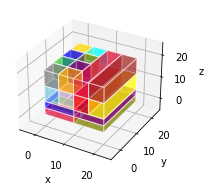

In [21]:
ax = vis_box(boxes,gt_tmp)

In [30]:
import random

def random_array(a, minV, maxV):
    for i, b in enumerate(a):
        c = b + random.uniform(minV, maxV)
        a[i] = c
        
    return a

In [34]:
a = [12.51] * 10
a = random_array(a, -5.0, 5.0)
b = [54.35] * 20
b = random_array(b, -5.0, 5.0)
c = [63.12] * 20
c = random_array(c, -5.0, 5.0)
d = [65.65] * 20
d = random_array(d, -5.0, 5.0)
e = [67.23] * 30
e = random_array(e, -5.0, 5.0)

res = a + b + c + d + e
res

[9.003894002282024,
 10.528701968126871,
 10.45842821189709,
 11.474516565271609,
 17.455681067991215,
 9.24526492834156,
 9.09097665040548,
 10.932097206062167,
 14.292811938868011,
 17.045398889430636,
 51.113812041956194,
 53.149438674529726,
 56.408658817701074,
 51.784491316697604,
 56.94316725790372,
 52.0107716108174,
 57.92190665092272,
 54.484015257247236,
 58.61159916688476,
 52.302868481351794,
 54.68843661389127,
 56.884150530124536,
 59.126993636685086,
 51.90753689597396,
 50.14677631378926,
 55.615100145592024,
 52.530976801034114,
 57.59354728853128,
 55.01056575206901,
 57.890886169870626,
 59.52307987314616,
 64.54812076637981,
 58.55229395256215,
 62.03559406053293,
 66.27979495057367,
 65.35626644170956,
 58.61131077329801,
 65.13511454570329,
 65.7234614889055,
 63.66359129300094,
 61.90105801025423,
 60.54592174810256,
 63.16274608282608,
 65.09613142463742,
 65.90061919564448,
 67.9694935707289,
 67.37036541914199,
 66.44921308533127,
 59.9701808015,
 67.20343623

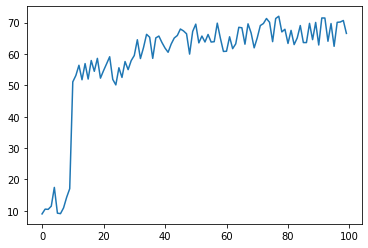

In [35]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(res))], res)

In [184]:
size_list

[array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([10, 10,  6]),
 array([10, 10,  6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([20, 20,  7]),
 array([20,  4,  7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([4, 4, 7])]

In [190]:
size_list

[array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([10, 10,  6]),
 array([10, 10,  6]),
 array([10, 10,  6]),
 array([10, 10,  6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([4, 5, 6]),
 array([20, 20,  7]),
 array([20, 20,  7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([4, 4, 7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([20,  4,  7]),
 array([4, 4, 7]),
 array([4, 4, 7])]

In [185]:
gt_tmp[0]

array([16, 10,  0])

C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


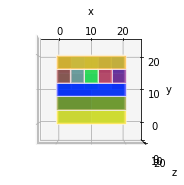

In [139]:
ax = vis_box(boxes,gt_tmp)
ax.view_init(90, -90) #z축

C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


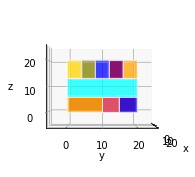

In [174]:
ax = vis_box(boxes,gt_tmp)
ax.view_init(0, 0) #y축

C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


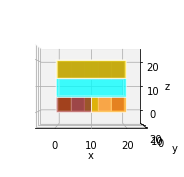

In [142]:
ax = vis_box(boxes,gt_tmp)
ax.view_init(0,-90) #x축

In [82]:
sq_g = np.squeeze(g_list)

In [80]:
con_g = np.squeeze(g_list)
con_g = np.concatenate(con_g)

In [83]:
sq_g.shape, con_g.shape

((22, 6, 4, 3), (132, 4, 3))

In [86]:
sq_g[0]

array([[[10., 20.,  0.],
        [10.,  0.,  0.],
        [15.,  0.,  0.],
        [15., 20.,  0.]],

       [[10.,  0.,  0.],
        [10.,  0.,  6.],
        [15.,  0.,  6.],
        [15.,  0.,  0.]],

       [[15.,  0.,  6.],
        [15.,  0.,  0.],
        [15., 20.,  0.],
        [15., 20.,  6.]],

       [[10.,  0.,  6.],
        [10.,  0.,  0.],
        [10., 20.,  0.],
        [10., 20.,  6.]],

       [[10., 20.,  0.],
        [10., 20.,  6.],
        [15., 20.,  6.],
        [15., 20.,  0.]],

       [[10., 20.,  6.],
        [10.,  0.,  6.],
        [15.,  0.,  6.],
        [15., 20.,  6.]]])

In [88]:
con_g[1]

array([[10.,  0.,  0.],
       [10.,  0.,  6.],
       [15.,  0.,  6.],
       [15.,  0.,  0.]])

In [57]:
boxes = np.squeeze(boxes)
gt_tmp = np.squeeze(gt_tmp)

for i, box, pos in zip(np.arange(len(boxes)), boxes, gt_tmp):
    s = 'Box {}: Size: ({}, {}, {}), Pos: ({}, {}, {})'.format(i + 1,
                                                              box[0], box[1], box[2],
                                                              pos[0], pos[1], pos[2])
    print(s)

Box 1: Size: (5, 5, 3), Pos: (5, 5, 0)
Box 2: Size: (5, 20, 3), Pos: (10, 0, 0)
Box 3: Size: (5, 20, 3), Pos: (0, 0, 0)
Box 4: Size: (5, 20, 3), Pos: (15, 0, 0)
Box 5: Size: (5, 5, 3), Pos: (5, 10, 0)
Box 6: Size: (5, 5, 3), Pos: (5, 0, 0)
Box 7: Size: (5, 5, 3), Pos: (5, 15, 0)
Box 8: Size: (20, 20, 3), Pos: (0, 0, 3)
Box 9: Size: (20, 20, 7), Pos: (0, 0, 6)
Box 10: Size: (4, 5, 7), Pos: (12, 5, 13)
Box 11: Size: (5, 5, 7), Pos: (10, 10, 13)
Box 12: Size: (5, 5, 7), Pos: (5, 10, 13)
Box 13: Size: (20, 5, 7), Pos: (0, 0, 13)
Box 14: Size: (5, 5, 7), Pos: (15, 10, 13)
Box 15: Size: (20, 5, 7), Pos: (0, 15, 13)
Box 16: Size: (4, 5, 7), Pos: (0, 5, 13)
Box 17: Size: (4, 5, 7), Pos: (4, 5, 13)
Box 18: Size: (4, 5, 7), Pos: (8, 5, 13)
Box 19: Size: (5, 5, 7), Pos: (0, 10, 13)
Box 20: Size: (4, 5, 7), Pos: (16, 5, 13)


In [ ]:
#합쳐서 20이 안되면 됨

In [166]:
gt_tmp

array([[16, 10,  0],
       [ 8, 10,  0],
       [ 4, 10,  0],
       [ 0,  0,  0],
       [10,  0,  0],
       [ 0, 10,  0],
       [16, 15,  0],
       [12, 15,  0],
       [ 8, 15,  0],
       [12, 10,  0],
       [ 4, 15,  0],
       [ 0, 15,  0],
       [ 0,  0,  6],
       [ 0,  0, 13],
       [12, 12, 13],
       [ 8, 12, 13],
       [ 4, 12, 13],
       [ 0, 12, 13],
       [ 0, 16, 13],
       [ 0,  4, 13],
       [ 0,  8, 13],
       [16, 12, 13]])

In [14]:
box = boxes[0]
box

array([ 5, 20,  6])

In [15]:
pos = gt_tmp[0]
pos

array([10,  0,  0])

In [228]:
X = [[[0,1,0],[0,0,0],[1,0,0],[1,1,0]],
     [[0,0,0],[0,0,1],[1,0,1],[1,0,0]],
     [[1,0,1],[1,0,0],[1,1,0],[1,1,1]],
     [[0,0,1],[0,0,0],[0,1,0],[0,1,1]],
     [[0,1,0],[0,1,1],[1,1,1],[1,1,0]],
     [[0,1,1],[0,0,1],[1,0,1],[1,1,1]]]
X = np.array(X).astype(float)

for i in range(3):
    X[:,:,i] *= pos[i]
X

ValueError: operands could not be broadcast together with shapes (6,4) (3,) (6,4) 

In [214]:
box

array([20,  4,  7])

In [222]:
X += box
X

array([[[ 4., 15.,  6.],
        [ 4.,  5.,  6.],
        [20.,  5.,  6.],
        [20., 15.,  6.]],

       [[ 4.,  5.,  6.],
        [ 4.,  5.,  6.],
        [20.,  5.,  6.],
        [20.,  5.,  6.]],

       [[20.,  5.,  6.],
        [20.,  5.,  6.],
        [20., 15.,  6.],
        [20., 15.,  6.]],

       [[ 4.,  5.,  6.],
        [ 4.,  5.,  6.],
        [ 4., 15.,  6.],
        [ 4., 15.,  6.]],

       [[ 4., 15.,  6.],
        [ 4., 15.,  6.],
        [20., 15.,  6.],
        [20., 15.,  6.]],

       [[ 4., 15.,  6.],
        [ 4.,  5.,  6.],
        [20.,  5.,  6.],
        [20., 15.,  6.]]])

In [223]:
g = []
g.append(X)
g

[array([[[ 4., 15.,  6.],
         [ 4.,  5.,  6.],
         [20.,  5.,  6.],
         [20., 15.,  6.]],
 
        [[ 4.,  5.,  6.],
         [ 4.,  5.,  6.],
         [20.,  5.,  6.],
         [20.,  5.,  6.]],
 
        [[20.,  5.,  6.],
         [20.,  5.,  6.],
         [20., 15.,  6.],
         [20., 15.,  6.]],
 
        [[ 4.,  5.,  6.],
         [ 4.,  5.,  6.],
         [ 4., 15.,  6.],
         [ 4., 15.,  6.]],
 
        [[ 4., 15.,  6.],
         [ 4., 15.,  6.],
         [20., 15.,  6.],
         [20., 15.,  6.]],
 
        [[ 4., 15.,  6.],
         [ 4.,  5.,  6.],
         [20.,  5.,  6.],
         [20., 15.,  6.]]])]

C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'z')

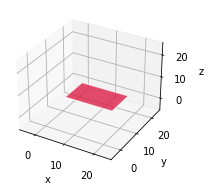

In [225]:
colors = get_colors(len(pos))
fig = plt.figure(figsize=(3,3))
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
pc = Poly3DCollection(np.concatenate(g),
                     facecolors = np.repeat(colors, 6), alpha = 0.5,
                     edgecolor='w')
ax.add_collection3d(pc)
ax.set_xlim([-5,25])
ax.set_ylim([-5,25])
ax.set_zlim([-5,25])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [178]:
boxes

array([[ 4,  5,  6],
       [ 4,  5,  6],
       [ 4,  5,  6],
       [10, 10,  6],
       [10, 10,  6],
       [ 4,  5,  6],
       [ 4,  5,  6],
       [ 4,  5,  6],
       [ 4,  5,  6],
       [ 4,  5,  6],
       [ 4,  5,  6],
       [ 4,  5,  6],
       [20, 20,  7],
       [20,  4,  7],
       [ 4,  4,  7],
       [ 4,  4,  7],
       [ 4,  4,  7],
       [ 4,  4,  7],
       [20,  4,  7],
       [20,  4,  7],
       [20,  4,  7],
       [ 4,  4,  7]])

In [226]:
box.shape

(3,)

In [16]:
box = box.reshape(1,3)
pos = pos.reshape(1,3)

In [245]:
pos

array([[16, 10,  0]])

['crimson']
[[[0. 5. 0.]
  [0. 0. 0.]
  [4. 0. 0.]
  [4. 5. 0.]]

 [[0. 0. 0.]
  [0. 0. 6.]
  [4. 0. 6.]
  [4. 0. 0.]]

 [[4. 0. 6.]
  [4. 0. 0.]
  [4. 5. 0.]
  [4. 5. 6.]]

 [[0. 0. 6.]
  [0. 0. 0.]
  [0. 5. 0.]
  [0. 5. 6.]]

 [[0. 5. 0.]
  [0. 5. 6.]
  [4. 5. 6.]
  [4. 5. 0.]]

 [[0. 5. 6.]
  [0. 0. 6.]
  [4. 0. 6.]
  [4. 5. 6.]]]


C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


<Axes3DSubplot:xlabel='x', ylabel='y'>

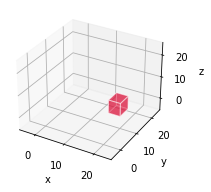

In [244]:
vis_box(box, pos)

In [241]:
box, pos

(array([[4, 5, 6]]), array([[16, 10,  0]]))

[[[10. 20.  0.]
  [10.  0.  0.]
  [15.  0.  0.]
  [15. 20.  0.]]

 [[10.  0.  0.]
  [10.  0.  6.]
  [15.  0.  6.]
  [15.  0.  0.]]

 [[15.  0.  6.]
  [15.  0.  0.]
  [15. 20.  0.]
  [15. 20.  6.]]

 [[10.  0.  6.]
  [10.  0.  0.]
  [10. 20.  0.]
  [10. 20.  6.]]

 [[10. 20.  0.]
  [10. 20.  6.]
  [15. 20.  6.]
  [15. 20.  0.]]

 [[10. 20.  6.]
  [10.  0.  6.]
  [15.  0.  6.]
  [15. 20.  6.]]]


C:\Users\vfgtr\anaconda3\envs\learning\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'z')

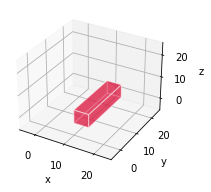

In [71]:
colors = get_colors(len(pos))
fig = plt.figure(figsize=(3,3))
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
g = []
for p, s, c in zip(pos, box, colors):
    X = [[[0,1,0],[0,0,0],[1,0,0],[1,1,0]],
         [[0,0,0],[0,0,1],[1,0,1],[1,0,0]],
         [[1,0,1],[1,0,0],[1,1,0],[1,1,1]],
         [[0,0,1],[0,0,0],[0,1,0],[0,1,1]],
         [[0,1,0],[0,1,1],[1,1,1],[1,1,0]],
         [[0,1,1],[0,0,1],[1,0,1],[1,1,1]]]
    X = np.array(X).astype(float)
    
    for i in range(3):
        X[:,:,i] *= s[i]
    X += np.array(p)
    print(X)
g.append(X)
pc = Poly3DCollection(np.concatenate(g), facecolors=np.repeat(colors, 6),
                     alpha = 0.5, edgecolor='w')
ax.add_collection3d(pc)
ax.set_xlim([-5,25])
ax.set_ylim([-5,25])
ax.set_zlim([-5,25])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [243]:
def cuboid_data(o, size=(1,1,1)): #큐브로 만듬
    X = [[[0,1,0],[0,0,0],[1,0,0],[1,1,0]],
         [[0,0,0],[0,0,1],[1,0,1],[1,0,0]],
         [[1,0,1],[1,0,0],[1,1,0],[1,1,1]],
         [[0,0,1],[0,0,0],[0,1,0],[0,1,1]],
         [[0,1,0],[0,1,1],[1,1,1],[1,1,0]],
         [[0,1,1],[0,0,1],[1,0,1],[1,1,1]]]
    X = np.array(X).astype(float)
    
    for i in range(3):
        X[:,:,i] *= size[i]
    print(X)
    X += np.array(o)
    return X

In [233]:
def plotCubeAt(positions, sizes=None, colors=None, **kwargs):
    g = []
    for p,s,c in zip(positions, sizes, colors):
        g.append(cuboid_data(p, size=s))
    return g, Poly3DCollection(np.concatenate(g),
                           facecolors = np.repeat(colors,6), alpha = 0.5,
                           **kwargs)

In [231]:
def vis_box(sizes, positions):
    colors = get_colors(len(positions))
    print(colors)
    fig = plt.figure(figsize=(3,3))
    ax = fig.gca(projection='3d')
    ax.set_aspect('auto')
    g, pc = plotCubeAt(positions, sizes, colors=colors, edgecolor='w')
    g_list.append(g)
    ax.add_collection3d(pc)
    ax.set_xlim([-5,25])
    ax.set_ylim([-5,25])
    ax.set_zlim([-5,25])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax

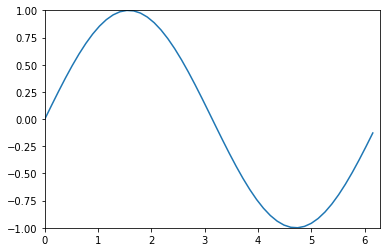

In [26]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

In [29]:
boxes, gt_tmp

(array([[ 5, 20,  6],
        [ 5, 20,  6],
        [ 5, 20,  6],
        [ 5, 20,  6],
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5, 20,  7],
        [ 5, 20,  7],
        [ 5, 20,  7],
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  7],
        [20,  5,  7],
        [10,  5,  7],
        [ 5,  5,  7],
        [10, 10,  7],
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  7]]),
 array([[10,  0,  0],
        [15,  0,  0],
        [ 5,  0,  0],
        [ 0,  0,  0],
        [10, 15,  6],
        [10,  5,  6],
        [ 5,  0,  6],
        [ 0,  0,  6],
        [15,  0,  6],
        [10, 10,  6],
        [10,  0,  6],
        [10,  5, 13],
        [ 0, 15, 13],
        [10,  0, 13],
        [ 5, 10, 13],
        [ 0,  0, 13],
        [15, 10, 13],
        [ 0, 10, 13],
        [10, 10, 13],
        [15,  5, 13]]))

In [35]:
state = np.array([0 for i in range(20) for j in range(20) for k in range(20)]).reshape(20,20,20)
state.shape, state

((20, 20, 20),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0,

In [36]:
import gym
env = gym.make("CartPole-v0")

In [38]:
env.reset()

array([ 0.01554591, -0.01677664, -0.02031759,  0.04779633])

In [39]:
env.action_space.n

2

In [40]:
env.step(1)

(array([ 0.01521038,  0.17863067, -0.01936166, -0.25122709]), 1.0, False, {})

In [46]:
class Env():
    def __init__(self):
        self.init_action = []
    def reset():

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [50]:
np.array([x for i in range(3) for x in range(20)]).reshape(3, 20)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19]])

In [70]:
state, reward, done, _ = env.step(2)
state, reward, done

AssertionError: 2 (<class 'int'>) invalid

In [53]:
state

array([ 0.02626346,  0.56947952, -0.03538528, -0.85021907])

In [54]:
reward

1.0

In [55]:
done

False